# Avvistamenti per ora del giorno

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor

# il nome della cartella dove verranno salvati i .png dei grafici
OUT_FOLDER = 'grafici/AvvistamentiOraDelGiorno'
# la dimensione dei grafici da generare
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [5]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

In [6]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])
counts = data['datetime'].dt.hour.value_counts()

In [7]:
hour_groups = [[23, 0, 1]] + [[h, h+1, h+2] for h in range(2, 23, 3)]
def find_group(hour):
    for i, g in enumerate(hour_groups):
        if hour in g: return i
    return -1
dt = data['datetime']
grouped_hours = dt.groupby(lambda i: find_group(dt.iloc[i].hour))
grouped_hours_counts = grouped_hours.size()

In [8]:
TITLE = 'Avvistamenti di UFO per fascia oraria'
LABELS = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups] + ['23:00-1:59']

## Versione mono colore

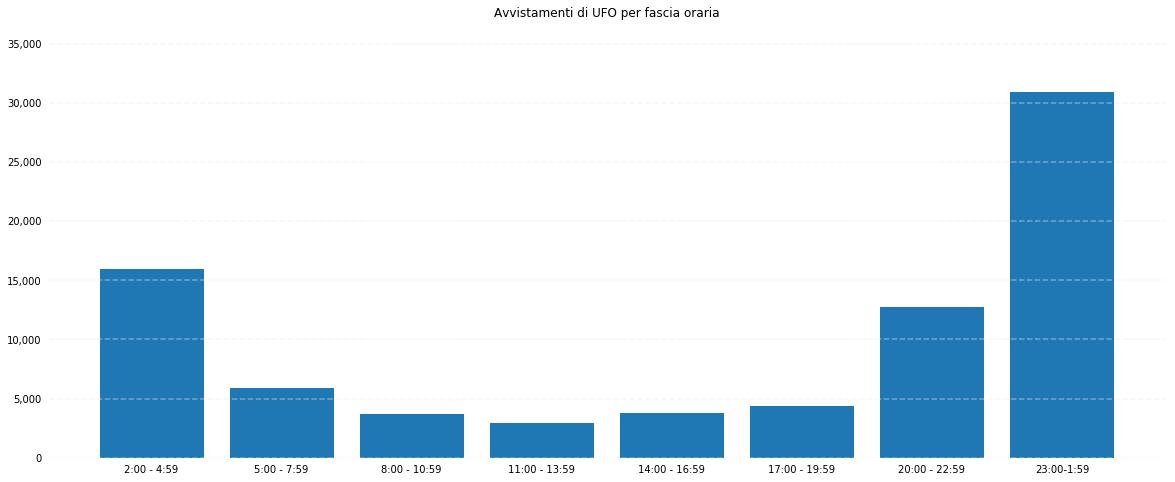

In [9]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.values)
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_title(TITLE)
ax.set_xticklabels(LABELS)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.savefig(f'{OUT_FOLDER}/SenzaColori.png')
plt.show()

## Versione a colori

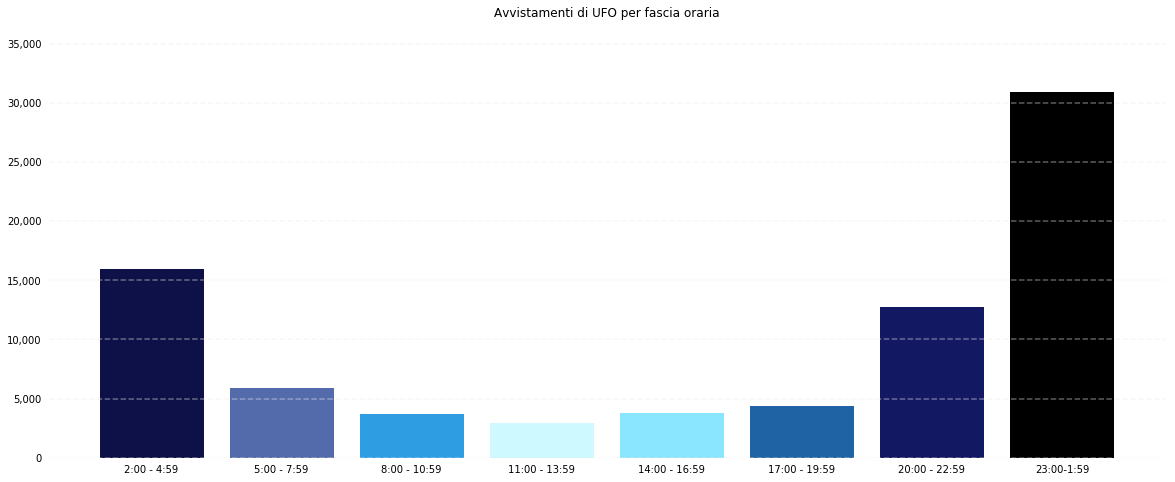

In [10]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

# Da [2:00, 4:59] a gruppi di 3 ore fino a [23:00, 1:59]
gradients = [
    (14, 17, 71), (84, 107, 171), (47,157,226), (205,249,255), 
    (138,229,255), (32,99,165), (19, 24, 98), (0, 0, 0)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]

bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.values, color=gradients)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_title(TITLE)
ax.set_xticklabels(LABELS)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/ConColori.png')
plt.show()